<a href="https://www.kaggle.com/code/aaditimenon/context-aware-ddos-detection-system-for-5g-v2x-net?scriptVersionId=260869763" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/v2x-vanet-cooperative-driving-dataset/Dataset.csv
/kaggle/input/mendeley-dataset-2019/mendeley_dataset.csv


# MENDELEY DDOS DATASET 2019

In [2]:
df_m = pd.read_csv('/kaggle/input/mendeley-dataset-2019/mendeley_dataset.csv')
df_m.head()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [3]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [4]:
df_m.shape

(431371, 80)

In [5]:
df_m.describe()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,431371.000000,431371.000000,4.313710e+05,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,...,431371.000000,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05
mean,126835.311055,13.948694,8.404856e+06,24.139117,2.472021,9.416956e+03,1.632896e+03,357.483674,294.721646,324.915327,...,21.893124,-2.315406e+07,3.370905e+04,2.563697e+04,6.757181e+04,1.868363e+04,2.449924e+06,4.983262e+05,2.971142e+06,1.993859e+06
std,87249.615423,4.966712,2.126596e+07,195.888896,56.370208,3.445253e+04,1.064056e+05,320.025929,273.298705,268.577313,...,54.559772,1.551755e+08,3.223119e+05,2.226543e+05,5.183739e+05,2.832011e+05,7.914010e+06,2.005164e+06,9.045327e+06,7.245561e+06
min,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53921.000000,6.000000,7.870000e+02,4.000000,0.000000,7.800000e+01,0.000000e+00,37.000000,6.000000,32.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,107842.000000,17.000000,4.480400e+04,4.000000,0.000000,2.064000e+03,0.000000e+00,440.000000,330.000000,428.000000,...,3.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,198357.500000,17.000000,3.002508e+06,16.000000,2.000000,5.160000e+03,0.000000e+00,516.000000,516.000000,516.000000,...,13.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,306200.000000,17.000000,1.199987e+08,86666.000000,31700.000000,1.526642e+07,5.842950e+07,32120.000000,2131.000000,3015.290500,...,18766.000000,6.724045e+07,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,1.192194e+08,6.961402e+07,1.192194e+08,1.192194e+08


# Identifying Features and Targets

**TARGETS**

In [6]:
target = df_m['Class']
print(target)

0         Attack
1         Attack
2         Attack
3         Attack
4         Attack
           ...  
431366    Benign
431367    Benign
431368    Benign
431369    Benign
431370    Benign
Name: Class, Length: 431371, dtype: object


In [7]:
print(target.value_counts())

Class
Attack    333540
Benign     97831
Name: count, dtype: int64


**FEATURE SET**

In [8]:
feature_set = df_m.drop(['Unnamed: 0','Label','Class'],axis=1)
print(feature_set)

        Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             17         216631                  6                       0   
1             17              2                  2                       0   
2             17             48                  2                       0   
3             17         107319                  4                       0   
4             17         107271                  4                       0   
...          ...            ...                ...                     ...   
431366         6         550740                  2                       1   
431367         6         337766                  1                       3   
431368         6            228                  1                       2   
431369        17          47709                  2                       2   
431370         6         322010                 30                      33   

        Fwd Packets Length Total  Bwd Packets Length Total  \
0

# Splitting into Training and Testing Sets

In [9]:
x = df_m.drop(['Unnamed: 0','Label','Class'], axis=1)
y = df_m['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

x_train.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
426420,17,45083,2,2,50.0,82.0,25.0,25.0,25.00000,0.000000,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393030,17,1913,46,0,20096.0,0.0,440.0,368.0,436.86957,14.845289,...,45,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179967,6,1,2,0,31.0,0.0,31.0,0.0,15.50000,21.920311,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274341,17,108004,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,...,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28860,6,25977433,4,0,24.0,0.0,6.0,6.0,6.00000,0.000000,...,3,20,0.0,0.0,0.0,0.0,25977432.0,0.0,25977432.0,25977432.0


In [10]:
x_test.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
277576,6,14867496,6,4,35.0,0.0,31.0,0.0,5.833334,12.335586,...,4,20,28860.0,0.000000,28860.0,28860.0,10001978.0,0.0,10001978.0,10001978.0
35734,6,35975176,6,0,36.0,0.0,6.0,6.0,6.000000,0.000000,...,5,20,1.0,0.000000,1.0,1.0,17987586.0,5454462.5,21844474.0,14130699.0
92855,6,45443255,12,10,97.0,60.0,31.0,6.0,8.083333,7.216878,...,11,20,28560.6,100.947014,28693.0,28432.0,9060090.0,2106780.2,10002397.0,5291367.0
170420,17,3003889,4,0,2064.0,0.0,516.0,516.0,516.000000,0.000000,...,3,20,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8915,17,213737,6,0,2088.0,0.0,393.0,321.0,348.000000,35.088460,...,5,20,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y_train.head()

426420    Benign
393030    Attack
179967    Benign
274341    Attack
28860     Attack
Name: Class, dtype: object

In [12]:
y_test.head()

277576    Benign
35734     Attack
92855     Benign
170420    Attack
8915      Attack
Name: Class, dtype: object

# Train Random Forest on Training Data

In [13]:
from sklearn.ensemble import RandomForestClassifier

def random_forest(n_estimators, random_state, class_weight, max_depth, max_features, min_samples_leaf):
    classifier = RandomForestClassifier(n_estimators = n_estimators, random_state = random_state, class_weight = class_weight, max_depth = max_depth, max_features = max_features, min_samples_leaf = min_samples_leaf)
    classifier.fit(x_train, y_train)
    return classifier

**Predicting the output**

In [14]:
model = random_forest(n_estimators=50, random_state=42, class_weight="balanced", max_depth=3, max_features=3, min_samples_leaf = 300)
y_test_predicted = model.predict(x_test)
y_train_predicted = model.predict(x_train)

# Comparing the output with the target set

**Accuracy**

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_test = accuracy_score(y_test, y_test_predicted)
print("accuracy_test:",accuracy_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
print("accuracy_train:",accuracy_train)


accuracy_test: 0.967267458707621
accuracy_train: 0.966751280803023


**Confusion Matrix**

[[64092  2617]
 [  207 19359]]


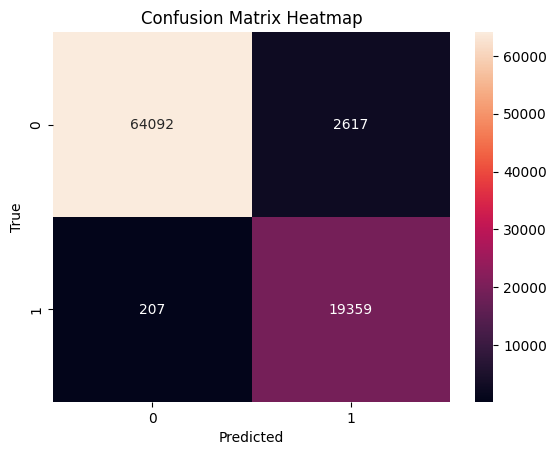

In [16]:
import seaborn
import matplotlib.pyplot as plt

confusionmatrix = confusion_matrix(y_test,y_test_predicted)
print(confusionmatrix)

seaborn.heatmap(confusionmatrix, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

**Feature Importance**

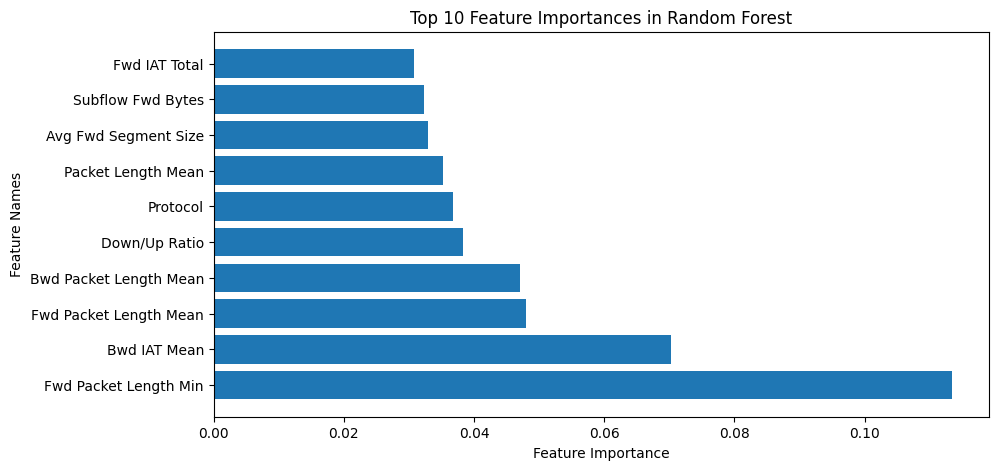

In [17]:
import matplotlib.pyplot as plt

feature_imp = model.feature_importances_
feature_list = [(name,importance) for name, importance in zip(x_train, feature_imp)]
sorted_list = sorted(feature_list, reverse=True, key= lambda x: x[1])
top_features = sorted_list[:10]
feature_names = [name for name, imp in top_features]  
importance_values = [imp for name, imp in top_features]  

plt.figure(figsize=(10,5)) 
plt.barh(feature_names, importance_values) 
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top 10 Feature Importances in Random Forest')
plt.show()

**Classification Report**

In [18]:
report = classification_report(y_test,y_test_predicted)
print(report)

              precision    recall  f1-score   support

      Attack       1.00      0.96      0.98     66709
      Benign       0.88      0.99      0.93     19566

    accuracy                           0.97     86275
   macro avg       0.94      0.98      0.96     86275
weighted avg       0.97      0.97      0.97     86275



# V2X Vanet Cooperative Driving Dataset